# Exercise Week 1 - Individual

## 1. Descriptive Statistics

In [8]:
import pandas as pd
import statistics as stats

# Load the dataset
df = pd.read_csv("/Users/I568980/Documents/Martin/SRH/Sem_1/MachineLearning_Submission/MachineLearningSubmissions/Exercise_Week1_Individual/archive/Iris.csv")

# Calculations
def mean_func(values):
    return stats.mean(values)

def median_func(values):
    return stats.median(values)

def stddev_func(values):
    return stats.stdev(values)

# Group by species and aggregate the calculations
stats_df = df.groupby("Species")["SepalLengthCm"].agg(
    Mean=mean_func,
    Median=median_func,
    StdDev=stddev_func
)

# Identify species with the highest variability
most_variable_species = stats_df["StdDev"].idxmax()
highest_std = stats_df.loc[most_variable_species, "StdDev"]

print("Descriptive statistics for SepalLengthCm (grouped by Species):")
print(stats_df)

print("Species with highest variability in SepalLengthCm: ", most_variable_species, highest_std)

Descriptive statistics for SepalLengthCm (grouped by Species):
                  Mean  Median    StdDev
Species                                 
Iris-setosa      5.006     5.0  0.352490
Iris-versicolor  5.936     5.9  0.516171
Iris-virginica   6.588     6.5  0.635880
Species with highest variability in SepalLengthCm:  Iris-virginica 0.6358795932744321


### Interpretation
The iris species with the highest standard deviation shows the greatest variability in it's sepal length. In this dataset the Iris-virginica has the most variable SepalLengthCm.

## 2. Central Tendency & Dispersion (Petal Length)

In [9]:
from statistics import StatisticsError

# Calculations
def mode_func(values):
    try:
        return stats.mode(values)
    except StatisticsError:
        return None

def variance_func(values):
    return stats.variance(values)

# Group by species and aggregate the calculations
stats_df = df.groupby("Species")["PetalLengthCm"].agg(
    Mean=mean_func,
    Median=median_func,
    Mode=mode_func,
    Variance=variance_func,
    StdDev=stddev_func
)

print("Central tendency & dispersion for PetalLengthCm:")
print(stats_df)


Central tendency & dispersion for PetalLengthCm (grouped by Species):
                  Mean  Median  Mode  Variance    StdDev
Species                                                 
Iris-setosa      1.464    1.50   1.5  0.030106  0.173511
Iris-versicolor  4.260    4.35   4.5  0.220816  0.469911
Iris-virginica   5.552    5.55   5.1  0.304588  0.551895


### When does the median tell a different story than the mean?
The median differs from the mean in case there are outliers within the data or the data is skewed. This is due to the fact that the mean is sensitive to outliers, while the median is not as sensitive to extreme values. In those cases the median better represents the 'typical' value found in a dataset.

## 3. Visualization



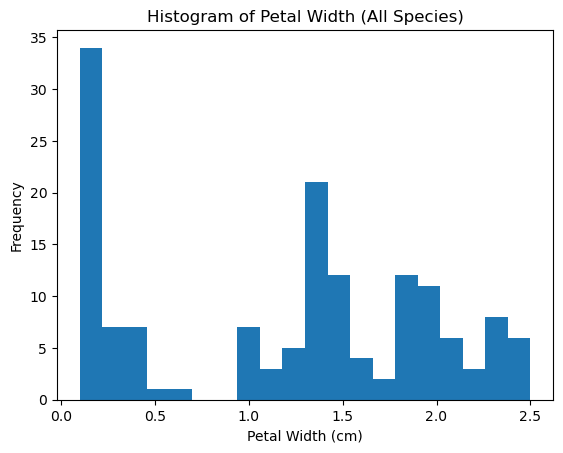

<Figure size 640x480 with 0 Axes>

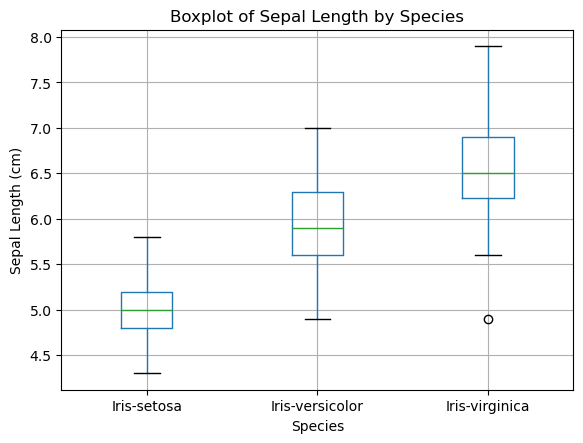

In [16]:
import matplotlib.pyplot as plt

# 1. Histogram of PetalWidthCm (all species combined)
plt.figure()
plt.hist(df["PetalWidthCm"], bins=20)
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Width (All Species)")
plt.show()

# 2. Boxplot of SepalLengthCm grouped by Species
plt.figure()
df.boxplot(column="SepalLengthCm", by="Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.title("Boxplot of Sepal Length by Species")
plt.suptitle("")
plt.show()


### Which plot better shows between-species differences, and why?
The boxplot displays the between-species differences better, due to the fact that it separates the data by species and clearly shows differences in medians and spread of data points. The histogram, which combines all species into one distribution, doesn't show the group-specific patterns.

## 4. Distributions & Skewness

In [17]:
from scipy.stats import skew

def skewness(values):
    return skew(values)

# Group by species and compute skewness for PetalLengthCm
skew_df = df.groupby("Species")["PetalLengthCm"].agg(
    Skewness=skewness
)

print("Skewness of PetalLengthCm by Species:")
print(skew_df)

# Identify most positively and negatively skewed species
most_positive = skew_df["Skewness"].idxmax()
most_negative = skew_df["Skewness"].idxmin()

print(f"Most positively skewed species: {most_positive} (skew = {skew_df.loc[most_positive, 'Skewness']:.3f})")
print(f"Most negatively skewed species: {most_negative} (skew = {skew_df.loc[most_negative, 'Skewness']:.3f})")


Skewness of PetalLengthCm by Species:
                 Skewness
Species                  
Iris-setosa      0.069673
Iris-versicolor -0.588159
Iris-virginica   0.532822

Most positively skewed species: Iris-virginica (skew = 0.533)
Most negatively skewed species: Iris-versicolor (skew = -0.588)


### Short interpretation
A positive skew means that the tail is to the right and most of the values are smaller than the mean. In this dataset, this is the case for the Iris-virginica. A negative skew shows that the tail is to the left and most values are larger than the mean. For this dataset, this is the case for the Iris-versicolor. The positive skewness of the Iris-virginica indicates, that a few long petals stretch the distribution to the right. The opposite is true for the Iris-versicolor, where a few short petals stretch the distribution to the left.

## 5. Sampling & Central Limit Theorem (Mini Task)

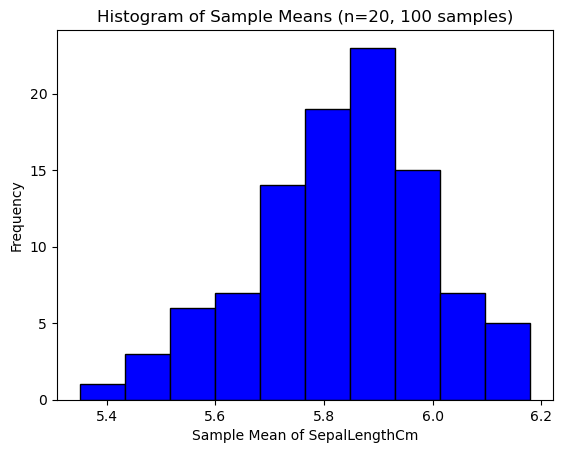

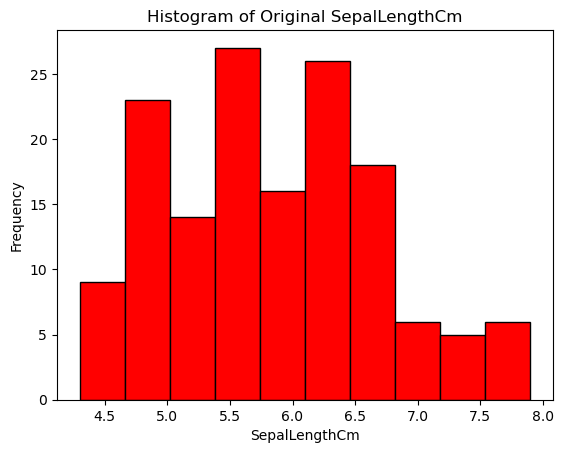

In [19]:
import random

sepal_lengths = df["SepalLengthCm"].tolist()

num_samples = 100
sample_size = 20

# Generate sample means
sample_means = []
for _ in range(num_samples):
    sample = random.sample(sepal_lengths, sample_size)
    sample_means.append(sum(sample)/len(sample))

# Plot histogram of sample means
plt.figure()
plt.hist(sample_means, bins=10, color='blue', edgecolor='black')
plt.xlabel("Sample Mean of SepalLengthCm")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means (n=20, 100 samples)")
plt.show()

# Plot histogram of original sepal length
plt.figure()
plt.hist(sepal_lengths, bins=10, color='red', edgecolor='black')
plt.xlabel("SepalLengthCm")
plt.ylabel("Frequency")
plt.title("Histogram of Original SepalLengthCm")
plt.show()

### Compare the two distributions
The histogram depicting the sample means (blue histogram) is more symmetric and bell-shaped than the original sepal length distribution (red histogram). This demonstrates the Central Limit Theorem: The distribution of the mean of random samples approaches a normal distribution as the number of samples increases.

## 6. Correlation

Pearson correlation (r) between SepalLengthCm and PetalLengthCm: 0.8717541573048715
Relationship: positive


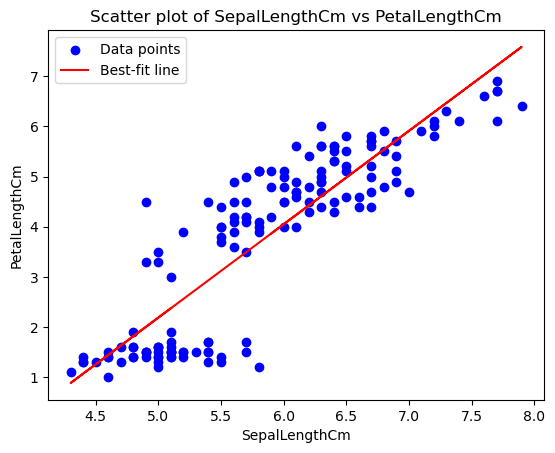

In [24]:
from scipy.stats import pearsonr
import numpy as np

# Extract the two variables
x = df["SepalLengthCm"]
y = df["PetalLengthCm"]

# Compute Pearson correlation coefficient
r, p_value = pearsonr(x, y)
print(f"Pearson correlation (r) between SepalLengthCm and PetalLengthCm: {r}")

# Determine type of relationship
if r > 0:
    relation = "positive"
elif r < 0:
    relation = "negative"
else:
    relation = "none"

print(f"Relationship: {relation}")

# Scatter plot with best-fit line
plt.figure()
plt.scatter(x, y, color='blue', label='Data points')

# Best-fit line
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red', label='Best-fit line')

plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.title("Scatter plot of SepalLengthCm vs PetalLengthCm")
plt.legend()
plt.show()


## 7. Hypothesis Testing: t-Test (2 Groups)

In [26]:
from scipy.stats import ttest_ind

# Extract PetalLengthCm for Setosa and Versicolor
setosa_petal = df[df["Species"] == "Iris-setosa"]["PetalLengthCm"]
versicolor_petal = df[df["Species"] == "Iris-versicolor"]["PetalLengthCm"]

# T-test
t_stat, p_value = ttest_ind(setosa_petal, versicolor_petal, equal_var=False)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    conclusion = "Reject H0: The mean petal lengths are significantly different."
else:
    conclusion = "Fail to reject H0: No significant difference in mean petal lengths."

print(f"Conclusion: {conclusion}")


t-statistic: -39.46866259397271
p-value: 1.057210030060349e-45
Conclusion: Reject H0: The mean petal lengths are significantly different.


## 8. Hypothesis Testing: ANOVA (3 Groups)

In [28]:
from scipy.stats import f_oneway

# Extract PetalWidthCm for each species
setosa_pw = df[df["Species"] == "Iris-setosa"]["PetalWidthCm"]
versicolor_pw = df[df["Species"] == "Iris-versicolor"]["PetalWidthCm"]
virginica_pw = df[df["Species"] == "Iris-virginica"]["PetalWidthCm"]

# ANOVA
f_stat, p_value = f_oneway(setosa_pw, versicolor_pw, virginica_pw)

print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    conclusion = "Reject H0: At least one species has a significantly different mean petal width."
else:
    conclusion = "Fail to reject H0: No significant difference in mean petal width among species."

print(f"Conclusion: {conclusion}")


F-statistic: 959.3244057257613
p-value: 4.376956957488959e-85
Conclusion: Reject H0: At least one species has a significantly different mean petal width.
